<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Bhavneesh_Intro_to_Keras_Assignment_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

###Regression on Boston Housing dataset

In [0]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/master/module3-Intro-to-Keras/Boston.csv')

In [2]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 15)

In [0]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [0]:
#columns rename function 

def rename_columns(X):
  X = X.copy()
       
    # Convert week_start_date to numeric form
  X = X.rename(columns={"crim": "per capita crime rate by town", "zn": "proportion of residential land zoned for lots over 25,000 sq.ft.", "indus": "proportion of non-retail business acres per town"})
  X =  X.rename(columns={"chas": "Charles River dummy variable", "nox": "nitric oxides concentration (parts per 10 million", "rm": "average number of rooms per dwelling"})
  X =  X.rename(columns={"age": "proportion of owner-occupied units built prior to 1940", "dis": "weighted distances to five Boston employment centres", "rad": "index of accessibility to radial highways"})
  X =  X.rename(columns={"tax": "full-value property-tax rate per $10,000", "ptratio": "pupil-teacher ratio by town", "black": "proportion of blacks by town"})
  X =  X.rename(columns={"lstat": "% lower status of the population", "medv": "Median value of owner-occupied homes in $1000s"})

    
    # return the dataframe with renamed columns
  return X

In [0]:
df = rename_columns(df)

In [9]:
df.head().T

,0,1,2,3,4
per capita crime rate by town,0.00632,0.02731,0.02729,0.03237,0.06905
"proportion of residential land zoned for lots over 25,000 sq.ft.",18.00000,0.00000,0.00000,0.00000,0.00000
proportion of non-retail business acres per town,2.31000,7.07000,7.07000,2.18000,2.18000
Charles River dummy variable,0.00000,0.00000,0.00000,0.00000,0.00000
nitric oxides concentration (parts per 10 million,0.53800,0.46900,0.46900,0.45800,0.45800
average number of rooms per dwelling,6.57500,6.42100,7.18500,6.99800,7.14700
proportion of owner-occupied units built prior to 1940,65.20000,78.90000,61.10000,45.80000,54.20000
weighted distances to five Boston employment centres,4.09000,4.96710,4.96710,6.06220,6.06220
index of accessibility to radial highways,1.00000,2.00000,2.00000,3.00000,3.00000
"full-value property-tax rate per $10,000",296.00000,242.00000,242.00000,222.00000,222.00000


In [10]:
df.isnull().sum()

per capita crime rate by town                                       0
proportion of residential land zoned for lots over 25,000 sq.ft.    0
proportion of non-retail business acres per town                    0
Charles River dummy variable                                        0
nitric oxides concentration (parts per 10 million                   0
average number of rooms per dwelling                                0
proportion of owner-occupied units built prior to 1940              0
weighted distances to five Boston employment centres                0
index of accessibility to radial highways                           0
full-value property-tax rate per $10,000                            0
pupil-teacher ratio by town                                         0
proportion of blacks by town                                        0
% lower status of the population                                    0
Median value of owner-occupied homes in $1000s                      0
dtype: int64

In [11]:
df.dtypes

per capita crime rate by town                                       float64
proportion of residential land zoned for lots over 25,000 sq.ft.    float64
proportion of non-retail business acres per town                    float64
Charles River dummy variable                                          int64
nitric oxides concentration (parts per 10 million                   float64
average number of rooms per dwelling                                float64
proportion of owner-occupied units built prior to 1940              float64
weighted distances to five Boston employment centres                float64
index of accessibility to radial highways                             int64
full-value property-tax rate per $10,000                              int64
pupil-teacher ratio by town                                         float64
proportion of blacks by town                                        float64
% lower status of the population                                    float64
Median value

In [0]:
#Explore relationships using seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


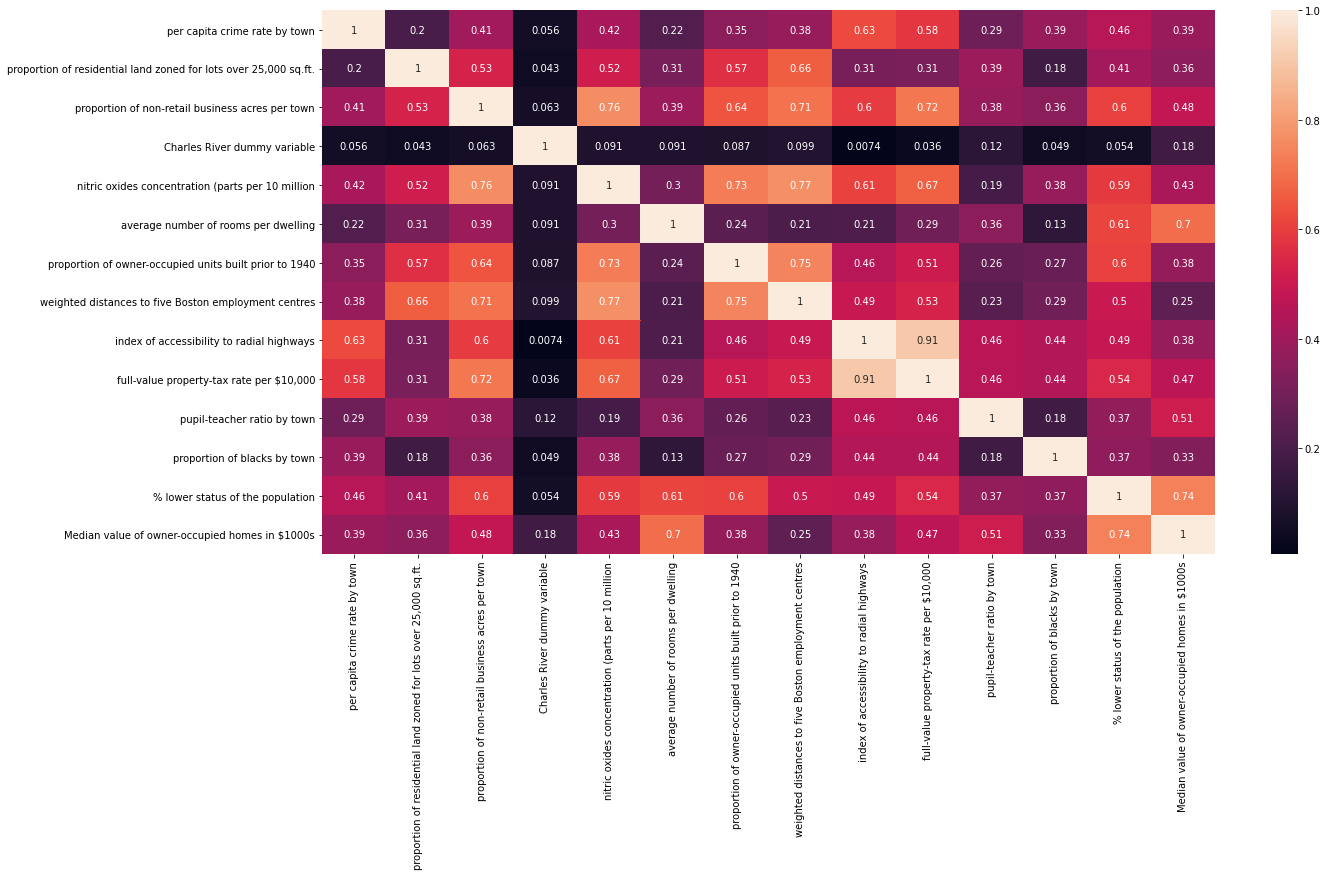

In [13]:
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [0]:
#From the visualization above, the median home value has high correlation with avg number of rooms, and % lower status of population

#We can use these two variables for multivariate linear regression

In [15]:
#Split into train and validation datasets

from sklearn.model_selection import train_test_split
train, val = train_test_split(df, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape

((404, 14), (102, 14))

##Baseline using zero features

In [16]:
#Baseline mean and MAE for regression
guess = train['Median value of owner-occupied homes in $1000s'].mean()

print('At the baseline, the mean of "Median value of owner-occupied homes in $1000s"=', guess)

At the baseline, the mean of "Median value of owner-occupied homes in $1000s"= 22.79653465346535


In [17]:
from sklearn.metrics import mean_squared_error

# Arrange y target vectors
target = 'Median value of owner-occupied homes in $1000s'
y_train = train[target]
y_val = val[target]

# Get mean baseline

guess = y_train.mean()
print('Mean Baseline (using 0 features)', guess)

# Train Error
y_pred = [guess] * len(y_train)
mae = mean_squared_error(y_train, y_pred)
print(f'Train mean squared error: {mae:.2f}')

# Val. Error
y_pred = [guess] * len(y_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Validation mean squared error: {mse:.2f}')

Mean Baseline (using 0 features) 22.79653465346535
Train mean squared error: 86.87
Validation mean squared error: 75.05


##Linear Regression using above two features

In [0]:
#From the visualization above, the median home value has high correlation with avg number of rooms, and 5 lower status of population

#We can use these two variables for multivariate linear regression

In [19]:
import pandas as pd
import plotly.express as px

px.scatter(
    train,
    x='Median value of owner-occupied homes in $1000s',
    y='average number of rooms per dwelling',
    #text='Year',
    title='Correlation between home value and avg number of rooms',
    trendline='ols',  # Ordinary Least Squares
)

#There appears a linear relationship between these two variables from the figure given below

In [20]:
import pandas as pd
import plotly.express as px

px.scatter(
    train,
    x='Median value of owner-occupied homes in $1000s',
    y='% lower status of the population',
    
    title='Correlation between home value and % lower status of the population',
    trendline='ols',)  # Ordinary Least Squares

    #There is an inverse relationship between these two variables from the figure given below

In [0]:
#Multivariate regression using these two variables and using Standardscaler

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error 


from sklearn.preprocessing import StandardScaler


# Re-arrange X features matrices
features = ['average number of rooms per dwelling', 
            '% lower status of the population']

print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_val = val[features]

target = 'Median value of owner-occupied homes in $1000s'
y_train = train[target]
y_val = val[target]

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Fit the model
lr.fit(X_train_scaled, y_train)
y_pred_train = lr.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Train MSE: {mse_train:.2f}')

# Apply the model to new data
y_pred_val = lr.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_pred_val)
print(f'Validation MSE: {mse_val:.2f}')

Linear Regression, dependent on: ['average number of rooms per dwelling', '% lower status of the population']
Train MSE: 30.39
Validation MSE: 31.24


###Regression using Keras Deep Feed Forward Neural Network and above two features

In [0]:
#Thus, there was a significant reduction in the validation MSE from 75.05 to 31.24 using the above two features only

#Let us use a Keras Deep Feed Forward Neural network and see if we can reduce the MSE further using these two features first and then rerun the NN model using all other features



In [0]:
import tensorflow

from tensorflow import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, PReLU

from tensorflow.keras.callbacks import EarlyStopping



In [0]:
#%load_ext tensorboard

#import os
#import datetime

#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [26]:
X_train.shape

(404, 2)

In [0]:
model = Sequential()

#Stacking layers on model

#Keras Deep Feed Forward Neural Network

#PRelu activation function

model.add(Dense(128, input_dim=2))
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2)) 

model.add(Dense(64))
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2)) 

model.add(Dense(32)) 
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear')) 

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               384       
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 128)               128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 64)                64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [32]:
#compile the model

stop = EarlyStopping(monitor='val_mse', min_delta=0.01, patience=3)

model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mse'])

history = model.fit(X_train_scaled, y_train, epochs=200, 
          validation_data=(X_val_scaled, y_val),
          callbacks=[stop])

Epoch 1/200
13/13 [==============================] - 0s 16ms/step - loss: 596.1682 - mse: 592.2395 - val_loss: 539.0521 - val_mse: 506.0928
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 543.7615 - mse: 542.4019 - val_loss: 466.9941 - val_mse: 432.6297
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 417.5295 - mse: 421.4155 - val_loss: 327.1195 - val_mse: 287.1238
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 219.4956 - mse: 222.8203 - val_loss: 172.6670 - val_mse: 124.0941
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 101.1945 - mse: 102.4458 - val_loss: 102.7599 - val_mse: 61.9784
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 66.7015 - mse: 67.4831 - val_loss: 83.0808 - val_mse: 48.8437
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 61.5259 - mse: 61.3846 - val_loss: 72.8811 - val_mse: 42.1521
Epoch 8/200
13/13 [================

In [0]:
##Thus, there was a further reduction in the validation MSE from 31.24 using multivariate linear regression to 18.73 using the Keras Deep FF NN and same two features

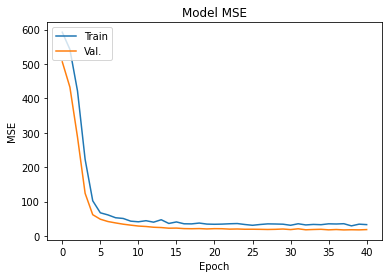

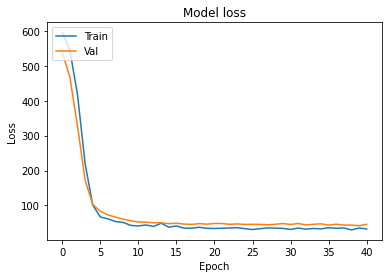

In [34]:
import matplotlib.pyplot as plt


# Plot training & validation MSE

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

###Keras Deep FF NN using all the 13 features in train dataset

In [36]:
train.head().T

,477,15,332,423,19
per capita crime rate by town,15.0234,0.62739,0.03466,7.05042,0.7258
"proportion of residential land zoned for lots over 25,000 sq.ft.",0.0000,0.00000,35.00000,0.00000,0.0000
proportion of non-retail business acres per town,18.1000,8.14000,6.06000,18.10000,8.1400
Charles River dummy variable,0.0000,0.00000,0.00000,0.00000,0.0000
nitric oxides concentration (parts per 10 million,0.6140,0.53800,0.43790,0.61400,0.5380
average number of rooms per dwelling,5.3040,5.83400,6.03100,6.10300,5.7270
proportion of owner-occupied units built prior to 1940,97.3000,56.50000,23.30000,85.10000,69.5000
weighted distances to five Boston employment centres,2.1007,4.49860,6.64070,2.02180,3.7965
index of accessibility to radial highways,24.0000,4.00000,1.00000,24.00000,4.0000
"full-value property-tax rate per $10,000",666.0000,307.00000,304.00000,666.00000,307.0000


In [37]:
train.dtypes

per capita crime rate by town                                       float64
proportion of residential land zoned for lots over 25,000 sq.ft.    float64
proportion of non-retail business acres per town                    float64
Charles River dummy variable                                          int64
nitric oxides concentration (parts per 10 million                   float64
average number of rooms per dwelling                                float64
proportion of owner-occupied units built prior to 1940              float64
weighted distances to five Boston employment centres                float64
index of accessibility to radial highways                             int64
full-value property-tax rate per $10,000                              int64
pupil-teacher ratio by town                                         float64
proportion of blacks by town                                        float64
% lower status of the population                                    float64
Median value

In [44]:
train.shape

(404, 14)

In [0]:

target = 'Median value of owner-occupied homes in $1000s'

# Get a dataframe with all train columns except the target

train_features = train.drop(columns=[target])

# all the features here are numeric 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

In [0]:
# Arrange data into X features matrix and y target vectors

X_train = train[numeric_features]
y_train = train[target]

X_val = val[numeric_features]
y_val = val[target]


In [43]:
X_train.shape, X_val.shape

((404, 13), (102, 13))

In [0]:
# Scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [0]:
model = Sequential()

#Stacking layers on model

#Keras Deep Feed Forward Neural Network

#PRelu activation function

model.add(Dense(128, input_dim=13))  #input dim = 13 here for no of features
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2)) 

model.add(Dense(64))
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2)) 

model.add(Dense(32)) 
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear')) 

In [48]:
#compile and fit the model

stop = EarlyStopping(monitor='val_mse', min_delta=0.01, patience=3)

model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mse'])

history = model.fit(X_train_scaled, y_train, epochs=200, 
          validation_data=(X_val_scaled, y_val),
          callbacks=[stop])

Epoch 1/200
13/13 [==============================] - 0s 11ms/step - loss: 590.6878 - mse: 593.3113 - val_loss: 521.9820 - val_mse: 489.1338
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 507.8310 - mse: 507.7425 - val_loss: 382.4549 - val_mse: 346.6025
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 292.7810 - mse: 297.2586 - val_loss: 155.8288 - val_mse: 118.6211
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 118.4200 - mse: 119.6893 - val_loss: 82.1599 - val_mse: 50.2860
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 72.6773 - mse: 73.4507 - val_loss: 69.4552 - val_mse: 35.4409
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 51.1799 - mse: 51.6295 - val_loss: 60.9362 - val_mse: 27.7959
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 42.4224 - mse: 42.7800 - val_loss: 57.9480 - val_mse: 24.3463
Epoch 8/200
13/13 [=====================

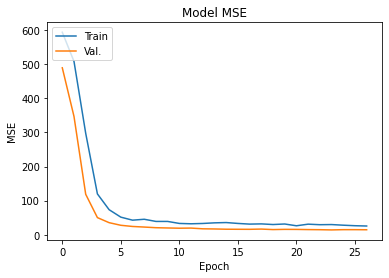

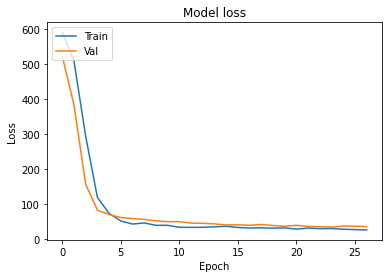

In [49]:
import matplotlib.pyplot as plt


# Plot training & validation MSE

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

##Test all 13 features using RandomForestRegresser and RandomSearchCV

In [0]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

In [0]:
# pipeline

pipeline = make_pipeline(   
    RandomForestRegressor(n_estimators=1000, n_jobs=-1, max_features='auto', random_state=42),
)

In [0]:
#define parameter distributions for RandomizedSearchCV
param_distributions = { 
    'randomforestregressor__n_estimators': randint(50, 1000), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, 25, 30, None],
}

In [59]:
X_train.shape, X_val.shape

((404, 13), (102, 13))

In [60]:
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

%time

search.fit(X_train, y_train);

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:    4.2s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:    4.7s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    5.1s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    5.4s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:    5.7s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    5.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    6.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.4s finished


In [61]:
print('Best hyperparameters', search.best_params_)

Best hyperparameters {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 909}
Accuracy -14.99846361490618


In [0]:
#make predictions on Val. set
pipeline = search.best_estimator_

In [0]:
# Predict on Val. Data
y_pred = pipeline.predict(X_val)

In [64]:
#Val. MSE

mse_val = mean_squared_error(y_val, y_pred)
print(f'RFRegressor + RandomSearchCV Validation MSE: {mse_val:.2f}')

RFRegressor + RandomSearchCV Validation MSE: 8.75


##Feature importances

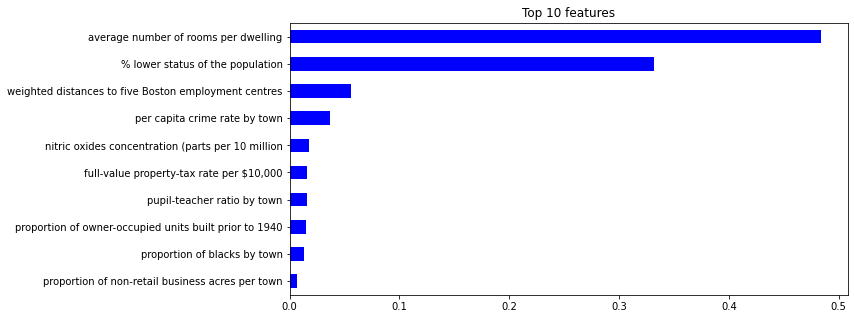

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
n = 10
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

###Elif weights for features

In [0]:
pip install eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipeline,
    scoring='neg_mean_squared_error',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val, y_val)

In [70]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

#Elif weights have higher importance than above feature importance bars

Weight,Feature
32.1764 ± 8.5623,% lower status of the population
30.2188 ± 7.8831,average number of rooms per dwelling
6.2117 ± 2.6460,weighted distances to five Boston employment centres
2.1541 ± 0.4903,per capita crime rate by town
2.1066 ± 1.1289,nitric oxides concentration (parts per 10 million
1.3027 ± 0.3999,pupil-teacher ratio by town
1.2382 ± 0.4849,proportion of owner-occupied units built prior to 1940
0.5710 ± 0.2723,"full-value property-tax rate per $10,000"
0.1994 ± 0.1769,proportion of non-retail business acres per town
0.1852 ± 0.1581,index of accessibility to radial highways




#Summary of results for Val. MSE:

####Zero features = 75.05

####Linear regression with two features = 31.24

####Keras Deep FF NN with two features = 18.73

####Keras Deep FF NN with 13 features = 14.69

####RandomForestRegressor + RandomSearchCV with 13 features = 8.75 >>> Best result



## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
#will do it in a separate notebook

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.